# **FIAP | Recommendation Systems**
## Trabalho Final
---

# <h1>1. Preparando o ambiente:

## 1.1 Configurando Drive:

In [1]:
url = 'https://raw.githubusercontent.com/KValim/Projetcs/main/FIAP/sistemas%20de%20recomendacao/projeto/dataset/netflix_dataset.csv'

## 1.2. Bibliotecas numéricas:

In [2]:
import pandas as pd

## 1.3. Bibliotecas gráficas:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1.4. Bibliotecas de Data Science:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# <h1>2. Análise exploratória (EDA)

## 2.1. Importando dataset:

In [5]:
path = url
netflix_dataset = pd.read_csv(path)

netflix_dataset.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7281 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]
    
uniq = pd.DataFrame(dict, index = ["Unique counts"]).transpose()
uniq

,Unique counts
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


In [8]:
temp = netflix_dataset.isnull().sum()
missing_values = pd.DataFrame({'Columns': temp.index, 'Valores faltantes': temp.values})
missing_values

,Columns,Valores faltantes
0,show_id,0
1,type,0
2,title,0
3,director,2389
4,cast,718
5,country,506
6,date_added,10
7,release_year,0
8,rating,7
9,duration,0


## 2.2. Análise de Filmes vs. Séries:

In [9]:
netflix_shows = netflix_dataset[netflix_dataset['type'] == 'TV Show']
netflix_movies = netflix_dataset[netflix_dataset['type'] == 'Movie']

Text(0.5, 1.0, 'Séries x Filmes')

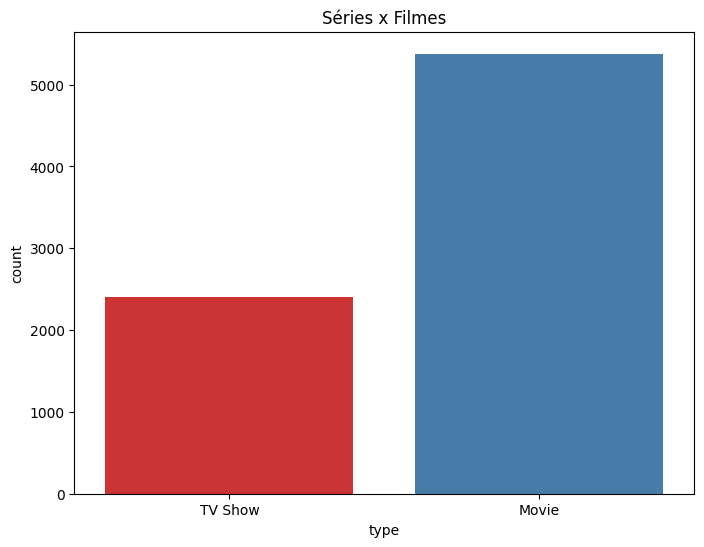

In [10]:
plt.figure(figsize=(8,6))
ax= sns.countplot(x = "type", data = netflix_dataset, palette="Set1")
ax.set_title("Séries x Filmes")

# <h1>3. Sistema de Recomendação:

## 3.1. Pré-processando o dataset:

In [11]:
# Substituindo NaN por espaço em branco
netflix_dataset_treated = netflix_dataset.fillna('')

In [12]:
# Normalizando as Strings: Removendo espaços e deixando todas as palavras em minúsculo
def clean_data(df_col):
        return str.lower(df_col.replace(" ", ""))

In [13]:
netflix_dataset_treated.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [14]:
# Selecionando as features que serão utilizado no modelo
features = ['title','director','cast','listed_in','description']
netflix_dataset_treated = netflix_dataset_treated[features]

In [15]:
# Aplicando a função clean_data no dataset
for feature in features:
    netflix_dataset_treated[feature] = netflix_dataset_treated[feature].apply(clean_data)
    
netflix_dataset_treated.head()

,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,07:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."
2,23:59,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","horrormovies,internationalmovies","whenanarmyrecruitisfounddead,hisfellowsoldiers..."
3,9,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","action&adventure,independentmovies,sci-fi&fantasy","inapostapocalypticworld,rag-dollrobotshideinfe..."
4,21,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",dramas,abrilliantgroupofstudentsbecomecard-countingex...


In [16]:
# Criando uma coluna chamada "soup" onde será a concatenação de todas as features que usaremos no modelo
def create_soup(df):
    return df['title']+ ' ' + df['director'] + ' ' + df['cast'] + ' ' +df['listed_in']+' '+ df['description']

netflix_dataset_treated['soup'] = netflix_dataset_treated.apply(create_soup, axis=1)

In [17]:
netflix_dataset_treated.head()

,title,director,cast,listed_in,description,soup
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...,"3% joãomiguel,biancacomparato,michelgomes,rod..."
1,07:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap...","07:19 jorgemichelgrau demiánbichir,héctorbonil..."
2,23:59,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","horrormovies,internationalmovies","whenanarmyrecruitisfounddead,hisfellowsoldiers...","23:59 gilbertchan teddchan,stellachung,henleyh..."
3,9,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","action&adventure,independentmovies,sci-fi&fantasy","inapostapocalypticworld,rag-dollrobotshideinfe...","9 shaneacker elijahwood,johnc.reilly,jenniferc..."
4,21,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",dramas,abrilliantgroupofstudentsbecomecard-countingex...,"21 robertluketic jimsturgess,kevinspacey,kateb..."


## 3.2. Criação do Sistema de Recomendação:

In [18]:
# Como o dataset está em Ingles, o CountVectorizer Object precisa ter todas as stop words como 'the', 'a', etc. removidas
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(netflix_dataset_treated['soup'])

# Cria a Matriz de Similaridade dos Cossenos a partir da count_matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

# Reseta o index do DataFrame principal
netflix_dataset_treated = netflix_dataset_treated.reset_index()
indices = pd.Series(netflix_dataset_treated.index, index=netflix_dataset_treated['title'])

In [19]:
# Função que tem como input o nome de um filme e retorna como output os filmes com maior similaridade
def get_recommendations(title, cosine_sim=cosine_sim):
    # Pega o Index do filme selecionado
    title = title.replace(' ','').lower()
    idx = indices[title]

    # Pega o Score de Similaridade de todos filmes com o filme selecionado
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordena de forma decrescente pelo Score de Similaridade
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Pega os 5 filmes com maiores Scores de Similaridade
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]

    # Retorna estes 5 filmes
    return netflix_dataset['title'].iloc[movie_indices]

In [20]:
get_recommendations('The Witcher')

7007    The Witcher: A Look Inside the Episodes
3878                         Making The Witcher
543                                Another Life
6958                       The Umbrella Academy
7386                                      Valor
Name: title, dtype: object